# Regression models

## Multiple Linear Regression

In [2]:
import numpy as np 
import pandas as pd 

import matplotlib.pylab as plt 
from pylab import rcParams

import sklearn
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import scale

In [3]:
%matplotlib inline
rcParams['figure.figsize'] = 5, 4

In [4]:
import seaborn as sb 
sb.set_style('whitegrid')
from collections import Counter

### Load Data

In [5]:
data_source = '../../inputs/enrollment-forecast.csv'
enroll = pd.read_csv(data_source, header=0)
enroll.head()

,year,roll,unem,hgrad,inc
0,1,5501,8.1,9552,1923
1,2,5945,7.0,9680,1961
2,3,6629,7.3,9731,1979
3,4,7556,7.5,11666,2030
4,5,8716,7.0,14675,2112


### Multiple linear regression on the enrollment data

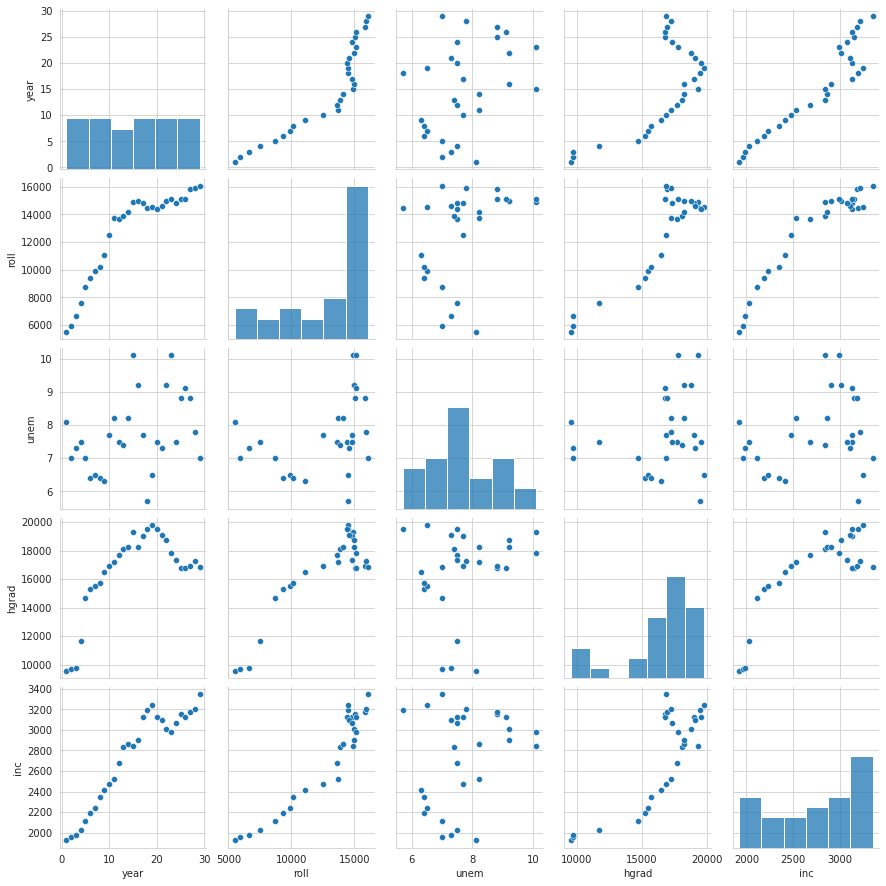

In [6]:
# Let's check for correlation
sb.pairplot(enroll)

In [7]:
print(enroll.corr())

           year      roll      unem     hgrad       inc
year   1.000000  0.900934  0.378305  0.670300  0.944287
roll   0.900934  1.000000  0.391344  0.890294  0.949876
unem   0.378305  0.391344  1.000000  0.177376  0.282310
hgrad  0.670300  0.890294  0.177376  1.000000  0.820089
inc    0.944287  0.949876  0.282310  0.820089  1.000000


In [11]:
# unem and hgrad are definitely show no correlation
enroll_data = enroll[['unem', 'hgrad']].values
enroll_target = enroll[['roll']].values 

enroll_data_names = ['unem', 'hgrad']
x, y = scale(enroll_data), enroll_target


### Checking for missing values

In [13]:
missing_values = x == np.NaN
x[missing_values == True]

array([], dtype=float64)

### Instantiate Linear Regression

In [16]:
LinReg = LinearRegression(normalize=True)

LinReg.fit(x,y)

print(R-square LinReg.score(x,y))

0.8488812666133723


Here is the R square of the prediction. It's a measure of how well the regression line that was predicted by the model actually matches the real values for college enrollment. Basically it is telling us how well the model performs in predicting college enrollment.

A maximum good score would be .99 and a minimum score would be .01. If you see a value of one or zero, you know something is wrong with your model. So this model has an R squared value of .84 which isn't too bad. Of course, this could be better but this is a fast demonstration of linear regression.